### Kpankaka Capital Investments: Importing the packages

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
from pandas import Series 
%matplotlib inline
import warnings 
warnings.filterwarnings("ignore")

### Reading the Kpankaka_Train and Kpankaka_Test data 

In [7]:
train = pd.read_csv("Kpankaka_Train.csv")
test = pd.read_csv("Kpankaka_Test.csv")

### Making a copy of the original dataset

In [9]:
train_original = train.copy()
test_original = test.copy()

### Looking at the features in the Kpankaka_Train and Kpankaka_Test datasets

In [11]:
train.columns, test.columns

(Index(['ID', 'Datetime', 'Count'], dtype='object'),
 Index(['ID', 'Datetime'], dtype='object'))

### Looking at the data types for each feature

In [12]:
train.dtypes, test.dtypes

(ID           int64
 Datetime    object
 Count        int64
 dtype: object,
 ID           int64
 Datetime    object
 dtype: object)

### Looking at the shape of the dataset

In [15]:
train.shape, test.shape

((18288, 3), (5112, 2))

### Changing the Datetime data type from the object type to the datetime type

In [17]:
train['Datetime'] = pd.to_datetime(train.Datetime,format='%d-%m-%Y %H:%M')
test['Datetime'] = pd.to_datetime(test.Datetime,format='%d-%m-%Y %H:%M')
test_original['Datetime'] = pd.to_datetime(test_original.Datetime,format='%d-%m-%Y %H:%M')
train_original['Datetime'] = pd.to_datetime(train_original.Datetime,format='%d-%m-%Y %H:%M')

### Extracting the year, month, date, and hour from the Datetime to validate our hypothesis

In [22]:
for i in (train, test, test_original, train_original): 
    i['year']=i.Datetime.dt.year
    i['month']=i.Datetime.dt.month
    i['day']=i.Datetime.dt.day
    i['hour']=i.Datetime.dt.hour

### Extracting the day of week from Datetime

In [23]:
train['dayofweek']=train['Datetime'].dt.dayofweek
temp = train['Datetime']

### Creating the weekend variable

In [37]:
def applyer(row):
    if row.dayofweek == 5 or row.dayofweek == 6:
        return 1
    else:
        return 0

temp2 = train['Datetime'].apply(applyer)
train['weekend'] = temp2

### Plotting the time series

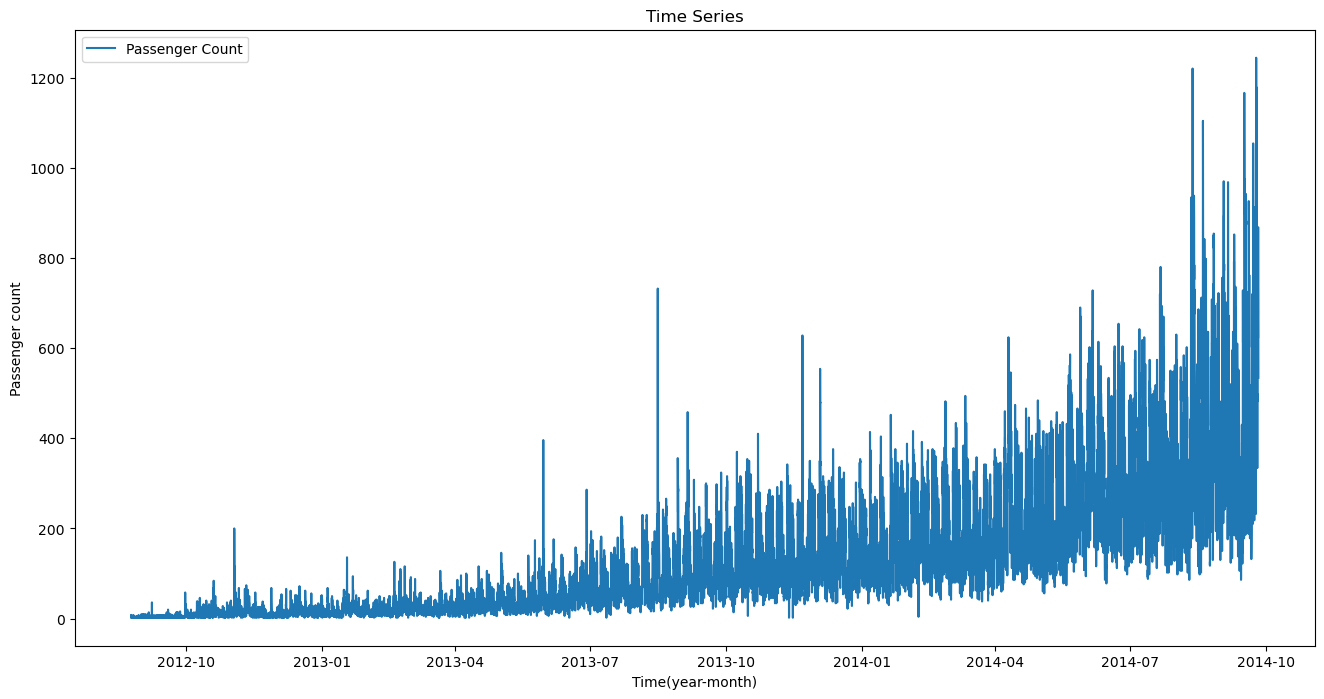

In [25]:
train.index = train['Datetime']
df = train.drop('ID',1)
ts = df['Count']
plt.figure(figsize=(16,8))
plt.plot(ts, label='Passenger Count')
plt.title('Time Series')
plt.xlabel("Time(year-month)")
plt.ylabel("Passenger count")
plt.legend(loc='best')

### Plotting the yearly passenger count

<AxesSubplot:xlabel='year'>

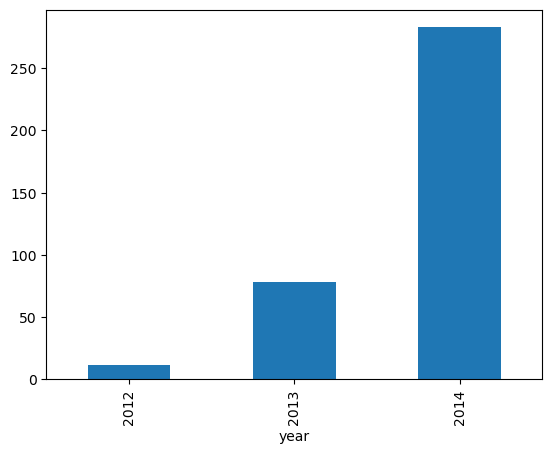

In [27]:
train.groupby('year')['Count'].mean().plot.bar()

### Plotting the Relationship between Count and month

<AxesSubplot:xlabel='month'>

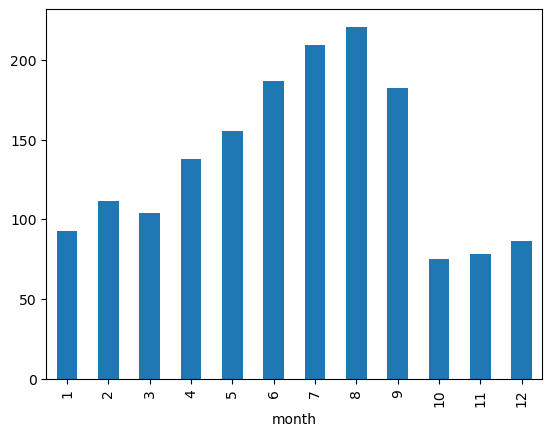

In [28]:
train.groupby('month')['Count'].mean().plot.bar()

### Monthwise Plot

<AxesSubplot:title={'center':'Passenger Count(MonthWise)'}, xlabel='year,month'>

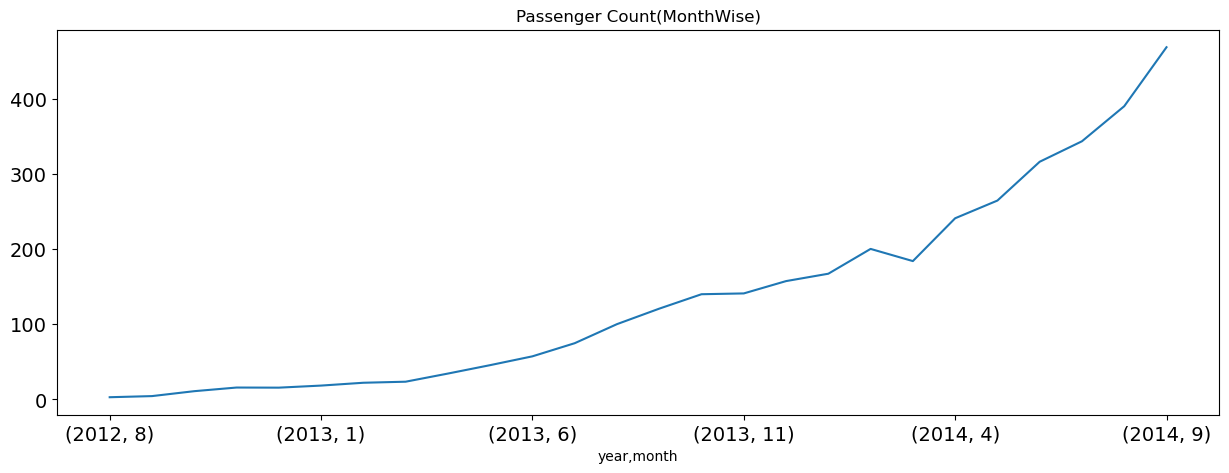

In [29]:
temp = train.groupby(['year', 'month'])['Count'].mean()
temp.plot(figsize=(15,5), title= 'Passenger Count(MonthWise)', fontsize=14)

### Looking at the daily mean of passenger count

<AxesSubplot:xlabel='day'>

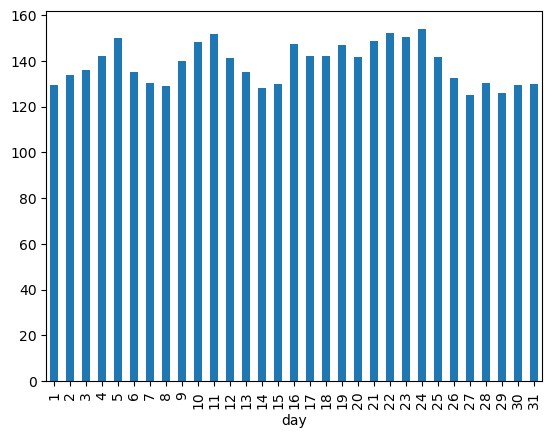

In [30]:
train.groupby('day')['Count'].mean().plot.bar()

### Plotting the mean of hourly passenger count

<AxesSubplot:xlabel='Hour'>

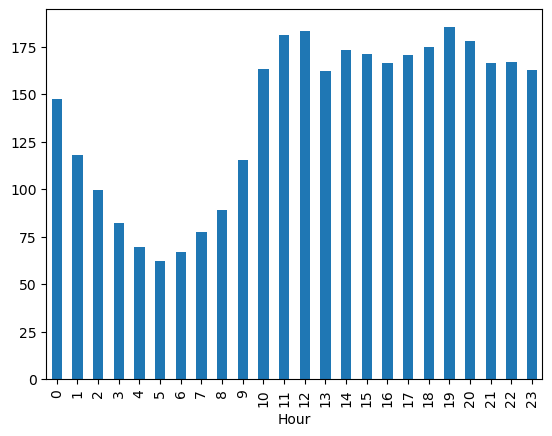

In [31]:
train.groupby('Hour')['Count'].mean().plot.bar()

### Plotting the mean of weekdays passenger count 

<AxesSubplot:xlabel='weekend'>

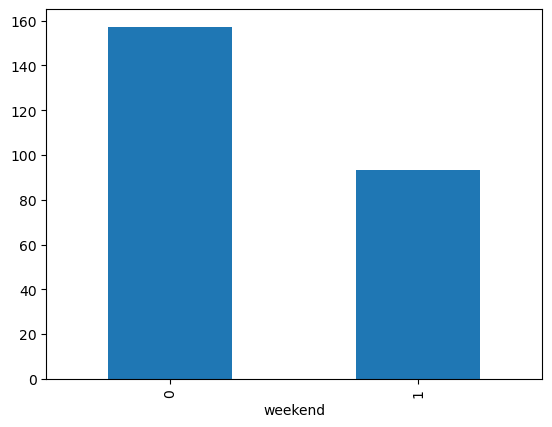

In [38]:
train.groupby('weekend')['Count'].mean().plot.bar()

### Plotting the daywise passenger count 

<AxesSubplot:xlabel='dayofweek'>

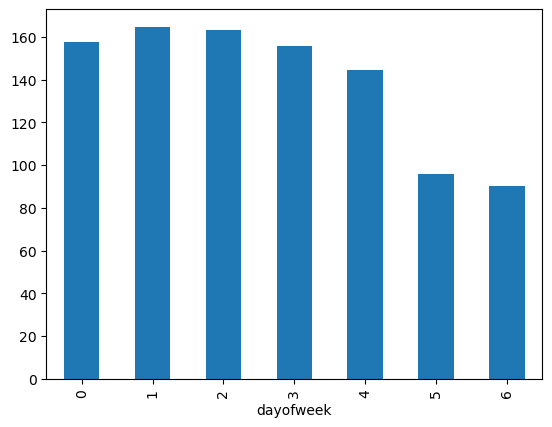

In [40]:
train.groupby('dayofweek')['Count'].mean().plot.bar()

### Dropping the ID variable 

In [41]:
train = train.drop('ID',1)

### Aggregating the Hourly Time Series 

In [46]:
train.Timestamp = pd.to_datetime(train.Datetime,format='%d-%m-%Y %H:%M')
train.index = train.Timestamp
hourly = train.resample('H').mean()
daily = train.resample('D').mean()
weekly = train.resample('W').mean()
monthly = train.resample('M').mean()

### Looking at the hourly, daily, weekly, and monthly time series 

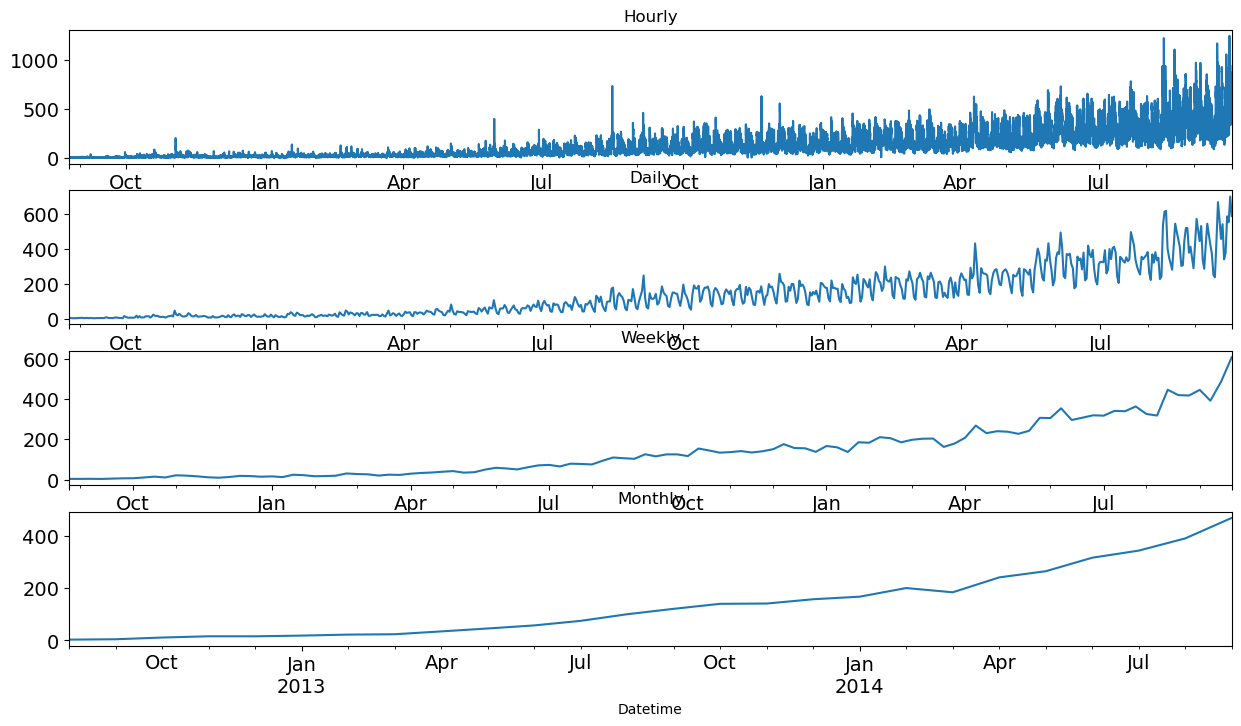

In [61]:
fig, axs = plt.subplots(4,1)
hourly.Count.plot(figsize=(15,8), title= 'Hourly', fontsize=14, ax=axs[0])
daily.Count.plot(figsize=(15,8), title= 'Daily', fontsize=14, ax=axs[1])
weekly.Count.plot(figsize=(15,8), title= 'Weekly', fontsize=14, ax=axs[2])
monthly.Count.plot(figsize=(15,8), title = 'Monthly', fontsize=14, ax=axs[3])
plt.show()

### Converting to daily mean 

In [ ]:
test.Timestamp = pd.to_datetime(test.Datetime,format='%d-%m-%Y %H:%M')
test.index = test.Timestamp
test = test.resample('D').mean()

In [78]:
train.Timestamp = pd.to_datetime(train.Datetime,format='%d-%m-%Y %H:%M')
train.index = train.Timestamp
train = train.resample('D').mean()

In [79]:
train.columns, test.columns

(Index(['Count', 'year', 'month', 'day', 'Hour', 'hour', 'dayofweek',
        'weekend'],
       dtype='object'),
 Index(['ID', 'year', 'month', 'day', 'Hour', 'hour'], dtype='object'))

### Splitting the data into training and validation part

In [85]:
Train = train.loc['2012-08-25':'2014-06-24']
valid = train.loc['2014-06-25':'2014-09-25']

### Plotting the daily ridership 

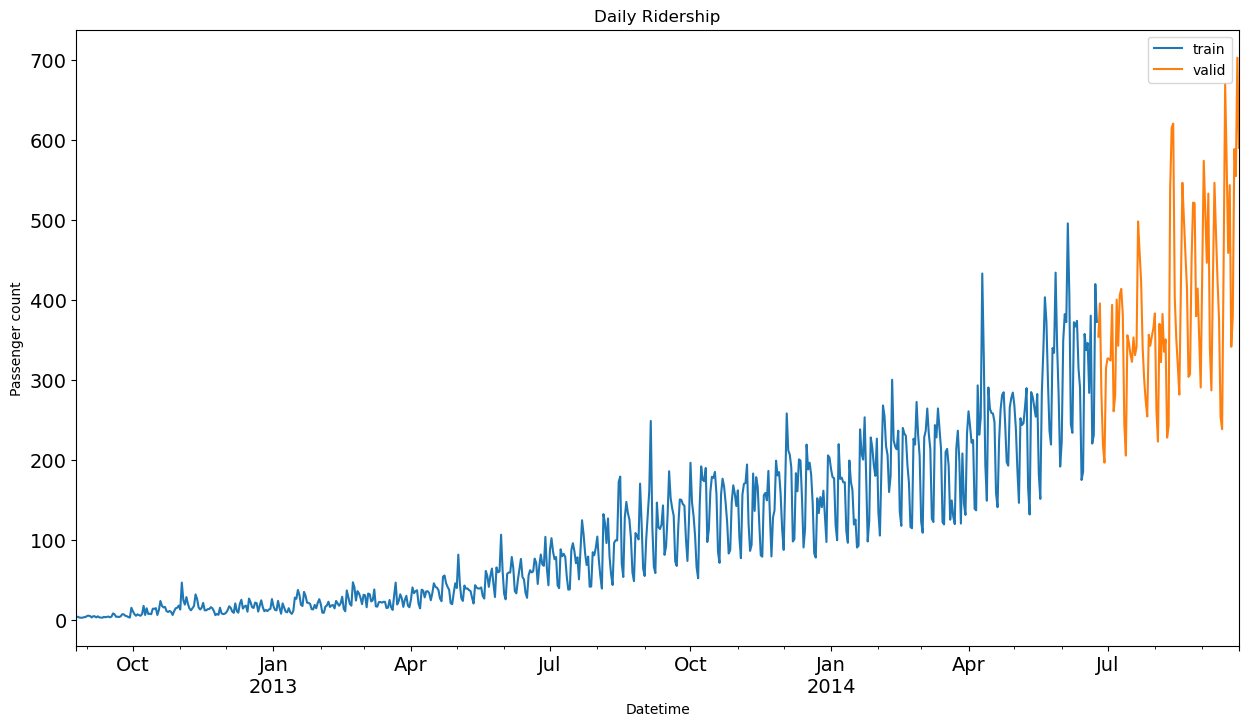

In [86]:
Train.Count.plot(figsize=(15,8), title='Daily Ridership', fontsize=14, label='train')
valid.Count.plot(figsize=(15,8), title='Daily Ridership', fontsize=14, label='valid') 
plt.xlabel("Datetime")
plt.ylabel("Passenger count") 
plt.legend(loc='best') 
plt.show()

### Naive Approach Forecasting

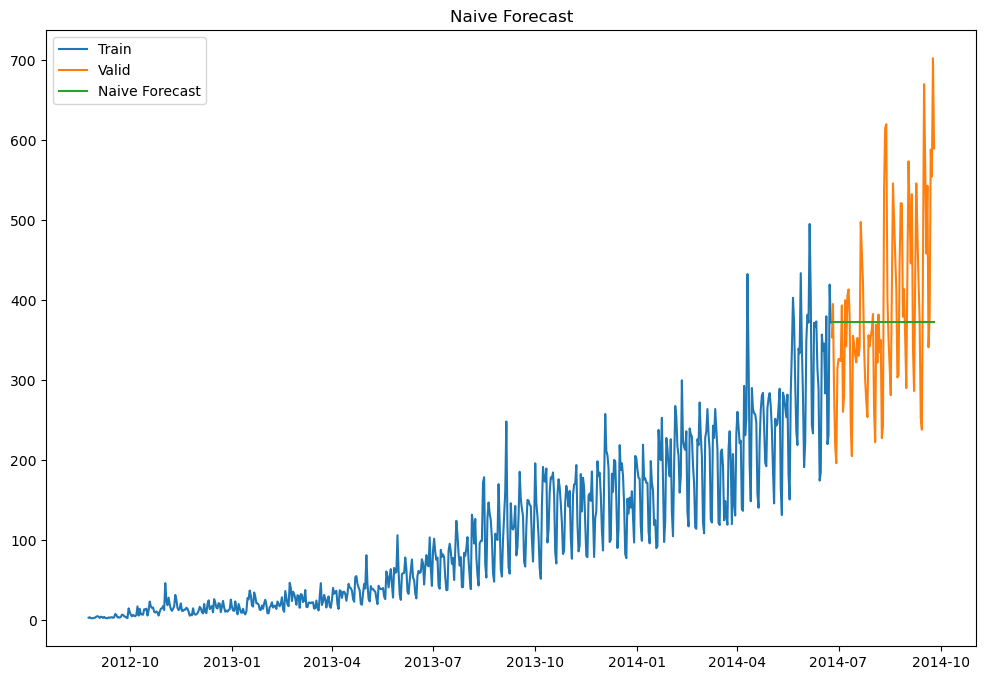

In [87]:
dd=np.asarray(Train.Count)
y_hat = valid.copy()
y_hat['naive'] = dd[len(dd)-1]
plt.figure(figsize=(12,8))
plt.plot(Train.index, Train['Count'], label='Train')
plt.plot(valid.index, valid['Count'], label='Valid')
plt.plot(y_hat.index,y_hat['naive'], label='Naive Forecast')
plt.legend(loc='best')
plt.title("Naive Forecast")
plt.show()

### Calculating RMSE with Naive Approach

In [89]:
from sklearn.metrics import mean_squared_error 
from math import sqrt
rms = sqrt(mean_squared_error(valid.Count, y_hat.naive))
print(rms)

111.79050467496724


### Moving Average Approach Forecasting

In [90]:
y_hat_avg = valid.copy()

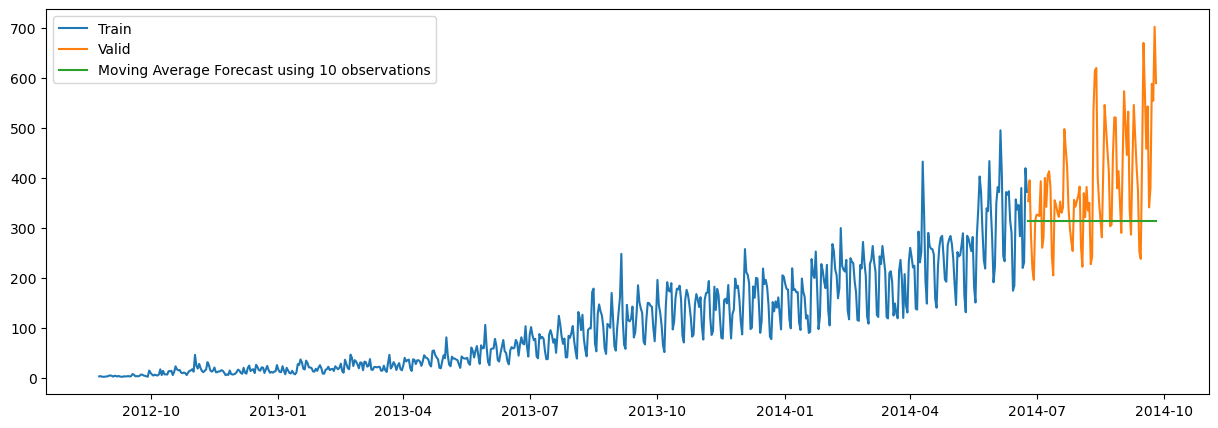

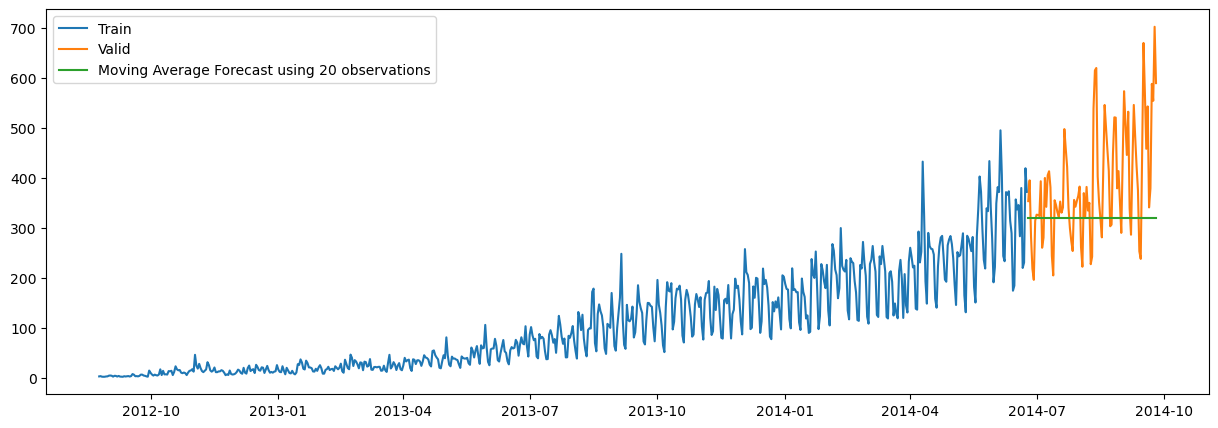

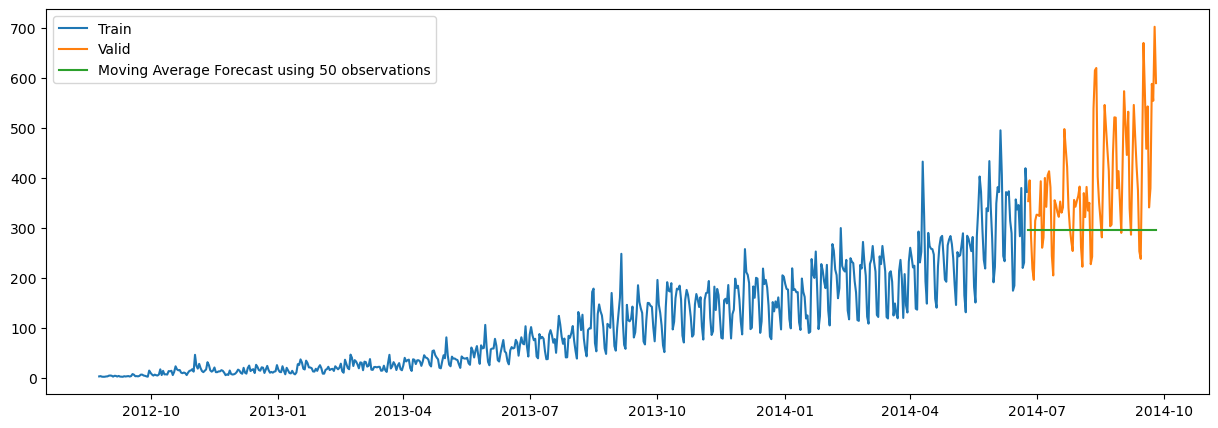

In [94]:
y_hat_avg['moving_avg_forecast'] = Train['Count'].rolling(10).mean().iloc[-1]
plt.figure(figsize=(15,5))
plt.plot(Train['Count'], label='Train')
plt.plot(valid['Count'], label='Valid')
plt.plot(y_hat_avg['moving_avg_forecast'], label='Moving Average Forecast using 10 observations')
plt.legend(loc='best')
plt.show()

y_hat_avg = valid.copy()
y_hat_avg['moving_avg_forecast'] = Train['Count'].rolling(20).mean().iloc[-1]
plt.figure(figsize=(15,5))
plt.plot(Train['Count'], label='Train')
plt.plot(valid['Count'], label='Valid')
plt.plot(y_hat_avg['moving_avg_forecast'], label='Moving Average Forecast using 20 observations')
plt.legend(loc='best')
plt.show()

y_hat_avg = valid.copy()
y_hat_avg['moving_avg_forecast'] = Train['Count'].rolling(50).mean().iloc[-1]
plt.figure(figsize=(15,5))
plt.plot(Train['Count'], label='Train')
plt.plot(valid['Count'], label='Valid')
plt.plot(y_hat_avg['moving_avg_forecast'], label='Moving Average Forecast using 50 observations')
plt.legend(loc='best')
plt.show()

### Calculating RMSE with Moving Average 

In [96]:
rms = sqrt(mean_squared_error(valid.Count, y_hat_avg.moving_avg_forecast))
print(rms)

144.19175679986793


### Simple Exponential Smoothing Forecasting

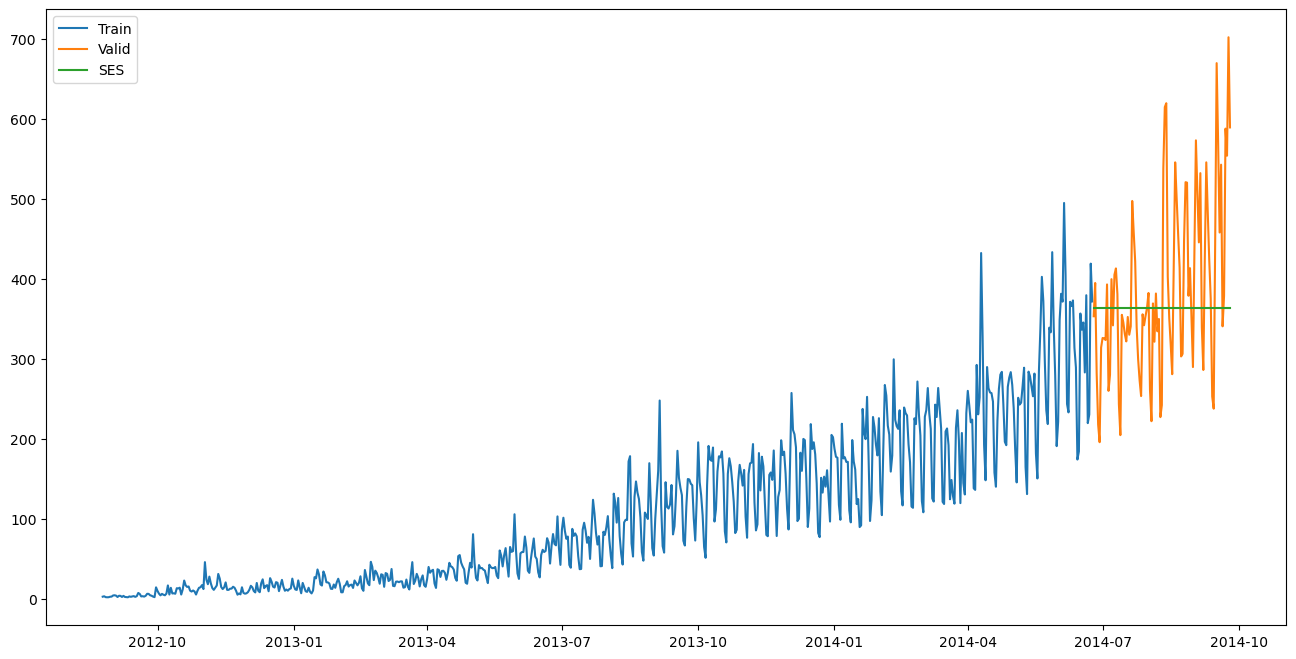

In [102]:
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt 
y_hat_avg = valid.copy()
fit2 = SimpleExpSmoothing(np.asarray(Train['Count'])).fit(smoothing_level=0.6,optimized=False) 
y_hat_avg['SES'] = fit2.forecast(len(valid))
plt.figure(figsize=(16,8))
plt.plot(Train['Count'], label='Train')
plt.plot(valid['Count'], label='Valid')
plt.plot(y_hat_avg['SES'], label='SES')
plt.legend(loc='best')
plt.show()

### Calculating RMSE with Simple Exponential Smoothing

In [103]:
rms = sqrt(mean_squared_error(valid.Count, y_hat_avg.SES))
print(rms)

113.43708111884514


### Decomposing the time series into four parts for Holt's linear trend model

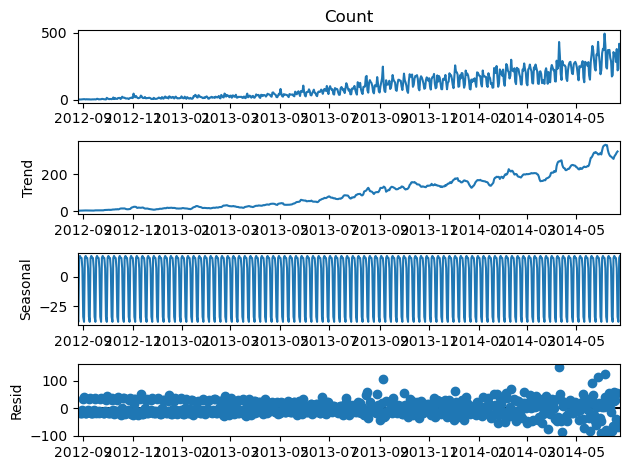

In [105]:
import statsmodels.api as sm
sm.tsa.seasonal_decompose(Train.Count).plot()
result = sm.tsa.stattools.adfuller(train.Count)
plt.show()

### Making the Holt's linear trend model based on the data 

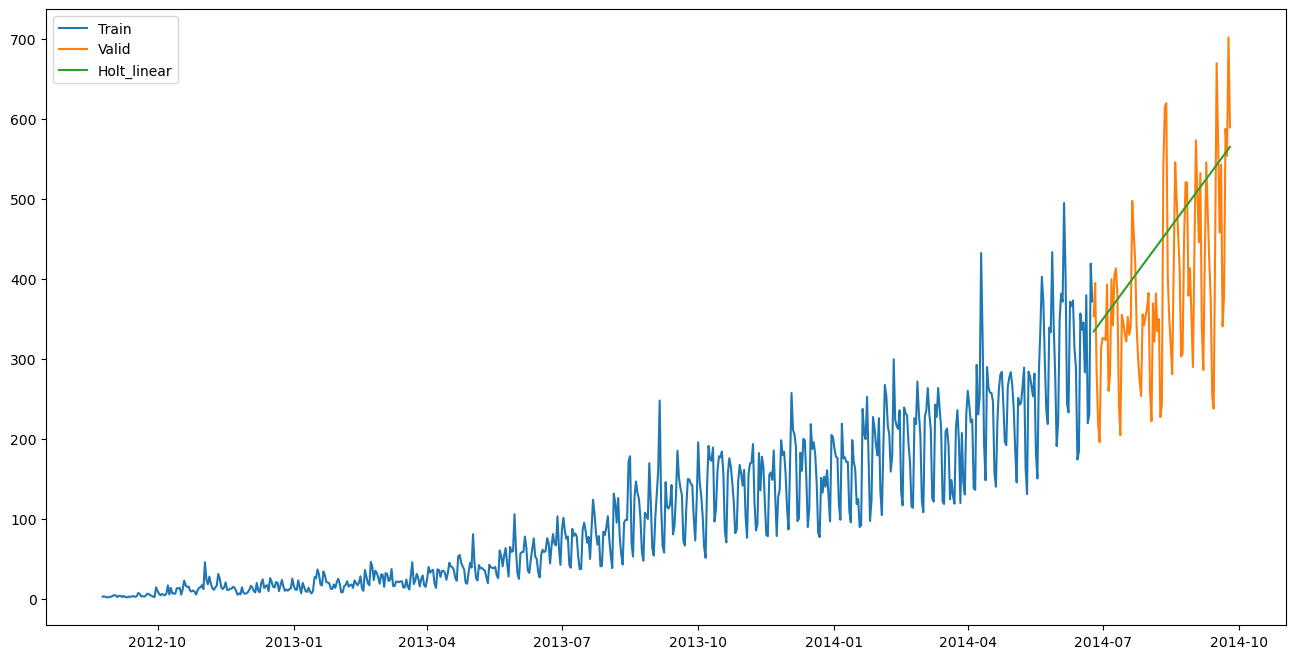

In [107]:
y_hat_avg = valid.copy()
fit1 = Holt(np.asarray(Train['Count'])).fit(smoothing_level = 0.3,smoothing_slope = 0.1)
y_hat_avg['Holt_linear'] = fit1.forecast(len(valid))
plt.figure(figsize=(16,8))
plt.plot(Train['Count'], label='Train')
plt.plot(valid['Count'], label='Valid')
plt.plot(y_hat_avg['Holt_linear'], label='Holt_linear')
plt.legend(loc='best')
plt.show()

### Calculating RMSE with Holt's linear trend model 

In [109]:
rms = sqrt(mean_squared_error(valid.Count, y_hat_avg.Holt_linear))
print(rms)

112.94278345314041


### Making the prediction for the test dataset

In [112]:
predict=fit1.forecast(len(test))

### Saving the prediction in the test file in a new column

In [113]:
test['prediction'] = predict

### Calculating the hourly ratio of count

In [116]:
train_original['ratio']=train_original['Count']/train_original['Count'].sum()

### Grouping the hourly ratio

In [117]:
temp=train_original.groupby(['Hour'])['ratio'].sum()

### Converting Groupby to the csv format

In [121]:
pd.DataFrame(temp, columns=['Hour','ratio']).to_csv("GROUPby.csv")

In [123]:
temp2 = pd.read_csv("GROUPby.csv")
temp2=temp2.drop('Hour.1',1)

### Merging test and test_original on day, month, and year

In [125]:
merge=pd.merge(test, test_original, on=('day', 'month', 'year'), how='left') 
merge['Hour']=merge['Hour_y']
merge=merge.drop(['year', 'month', 'Datetime','Hour_x','Hour_y'], axis=1)

### Prediciting by merging merge and temp2

In [126]:
prediction=pd.merge(merge, temp2, on='Hour', how='left')

### Converting the ratio to the original scale 

In [127]:
prediction['Count']=prediction['prediction']*prediction['ratio']*24
prediction['ID']=prediction['ID_y']

### Dropping all other features from the prediction file and keep ID and Count only

In [129]:
submission=prediction.drop(['ID_x', 'day', 'ID_y', 'prediction','Hour','ratio'], axis=1)

In [130]:
pd.DataFrame(submission, columns=['ID', 'Count']).to_csv('Holt linear.csv')

### Fitting the model and validating it

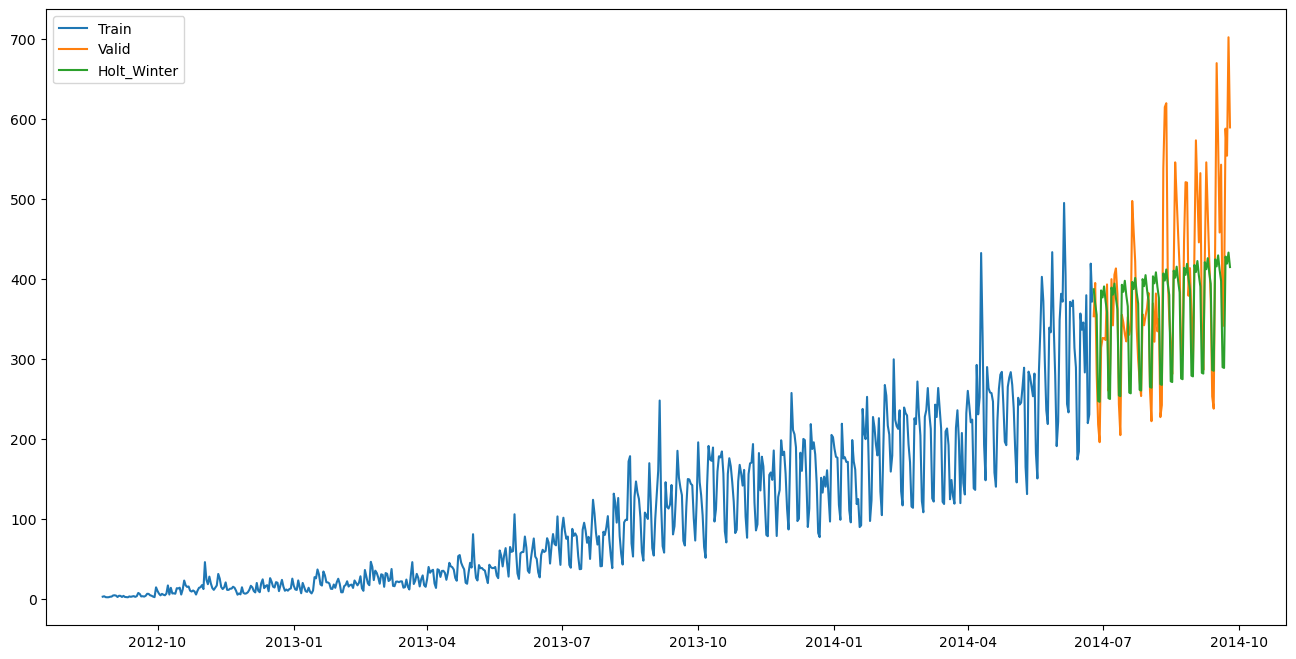

In [133]:
y_hat_avg = valid.copy()
fit1 = ExponentialSmoothing(np.asarray(Train['Count']),seasonal_periods=7,trend='add', seasonal = 'add',).fit()
y_hat_avg['Holt_Winter'] = fit1.forecast(len(valid))
plt.figure(figsize=(16,8))
plt.plot(Train['Count'], label='Train')
plt.plot(valid['Count'], label='Valid')
plt.plot(y_hat_avg['Holt_Winter'], label='Holt_Winter')
plt.legend(loc='best')
plt.show()

### Calculating RMSE with Holt's Winter Model

In [134]:
rms = sqrt(mean_squared_error(valid.Count, y_hat_avg.Holt_Winter))
print(rms)

82.17103714967703


### Forecasting the Counts for the entire length of the test dataset

In [137]:
predict =fit1.forecast(len(test))

### Converting the daily passenger Counts into hourly passenger counts 

In [143]:
test['prediction']=predict
merge = pd.merge(test, test_original, on=('day','month','year'), how='left')
merge['Hour']=merge['Hour_y']
merge=merge.drop(['year', 'month', 'Datetime', 'Hour_x', 'Hour_y'], axis=1)
prediction = pd.merge(merge, temp2, on='Hour', how='left')
prediction['Count']=prediction['prediction']*prediction['ratio']*24

### Dropping all the features other than ID and Count

In [ ]:
prediction['ID']=prediction['ID_y']
submission=prediction.drop(['day', 'Hour', 'ratio', 'prediction', 'ID_x', 'ID_y'],axis=1)
pd.DataFrame(submission,columns=['ID','Count']).to_csv('Holt winters.csv')